### FINAL TASK RAKAMIN INTERNSHIP
Pada kesempatan kali ini, saya akan menyelesaikan tugas akhir dari magang virtual yang diselenggarakan oleh rakamin. Tugas kali ini merupakan tugas secara langsung "pekerjaan" Data Science. Pada file ini akan dibangun sebuah model untuk memprediksi credit risk, dengan data yang telah disediakan.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
cwd = os.getcwd()
datapath = os.path.join(cwd, 'Data', 'loan_data_2007_2014.csv')
dataset = pd.read_csv(datapath)

In [37]:
df = dataset.copy()
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Berikut info null value dan tipe data dari dataset yang kita gunakan kali ini, terlihat banyak sekali atribut yang memiliki null value. Pada kesempatan kali ini, kita akan langsung saja mengeliminasi atribut tersebut (terlebih sudah terlalu banyak atribut (>70 atribut).

Disini saya akan melakukan berbagai percobaan:

1. Kita akan mengeliminasi semua atribut yang memiliki nilai null
2. Kita akan mengeliminasi atribut yang sama sekali tidak memiliki nilai (0 non-null sampai 25% panjang data).

In [38]:
# 1
df.dropna(inplace = True, axis = 1)

# 2. 
# for column in df.columns:
#     if df[column].isna().sum() > len(df) - 0.25 * len(df):
#         df.drop([column], inplace = True, axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               466285 non-null  int64  
 1   id                       466285 non-null  int64  
 2   member_id                466285 non-null  int64  
 3   loan_amnt                466285 non-null  int64  
 4   funded_amnt              466285 non-null  int64  
 5   funded_amnt_inv          466285 non-null  float64
 6   term                     466285 non-null  object 
 7   int_rate                 466285 non-null  float64
 8   installment              466285 non-null  float64
 9   grade                    466285 non-null  object 
 10  sub_grade                466285 non-null  object 
 11  home_ownership           466285 non-null  object 
 12  verification_status      466285 non-null  object 
 13  issue_d                  466285 non-null  object 
 14  loan

Sehingga, dari opsi 1 didapati hasil sisa yaitu data dengan 34 atribut dan berjumlah 4662285 baris.

### Pemahaman Data
1. loan_amnt : pembayaran bulan lalu yang diterima
2. funded_amnt : 

Melihat data grade dari credit card data dengan menghitung tiap grade yang ada pada data yang akan diprediksi.

<AxesSubplot:xlabel='grade', ylabel='count'>

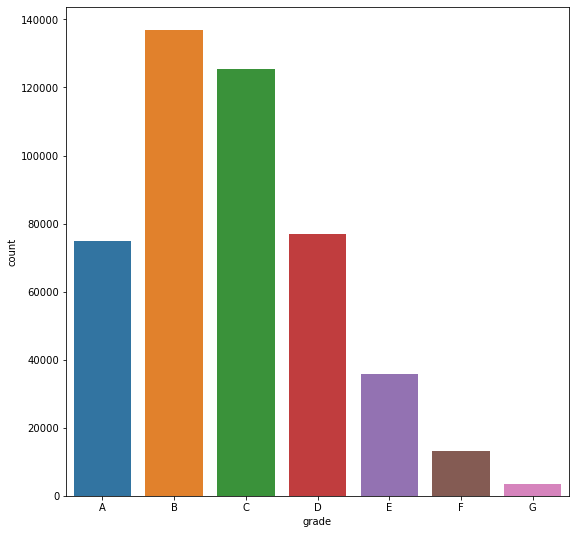

In [41]:
plt.figure(figsize = (9,9))
sns.countplot(data = df, x = 'grade', order = sorted(df.grade.unique()))

In [ ]:
plt.figure(figsize = (9,9))
sns.countplot(data = df, x = 'sub_grade', order = df.sub_grade)

drop null value data, yang kemudian menghasilkan 34 sisa atribut.

In [7]:
df.dropna(axis = 1, inplace = True)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL


#### Preprocessing data dengan tipe data object

In [9]:
colDatType = df.select_dtypes('object').columns

for i in colDatType:
    print('KOLOM {} \t : {}'.format(i, df[i].unique()))

KOLOM term 	 : [' 36 months' ' 60 months']
KOLOM grade 	 : ['B' 'C' 'A' 'E' 'F' 'D' 'G']
KOLOM sub_grade 	 : ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
KOLOM home_ownership 	 : ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
KOLOM verification_status 	 : ['Verified' 'Source Verified' 'Not Verified']
KOLOM issue_d 	 : ['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07' 'Dec-13'
 'Nov-13' 'Oct-13' 'Sep-13' 'Aug-13

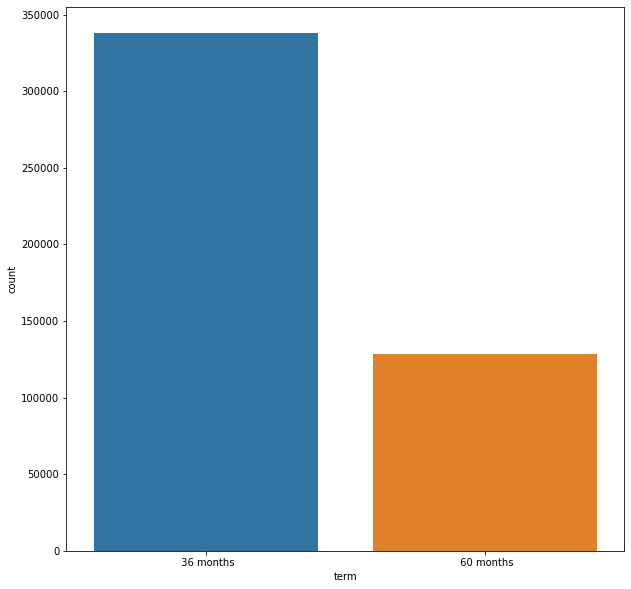

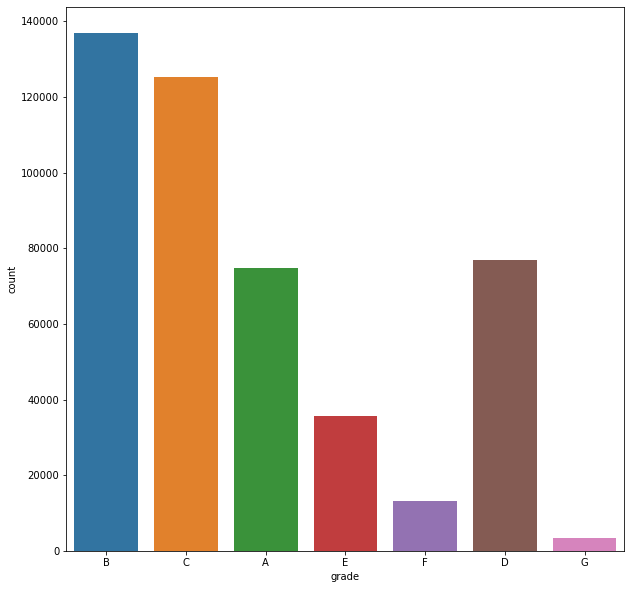

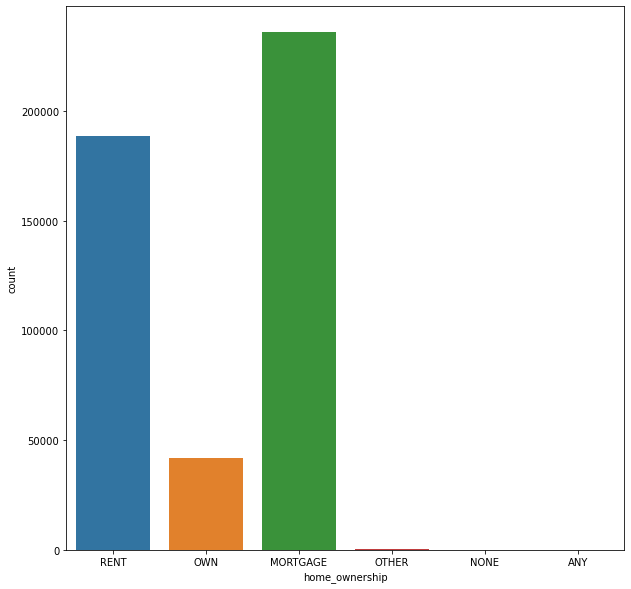

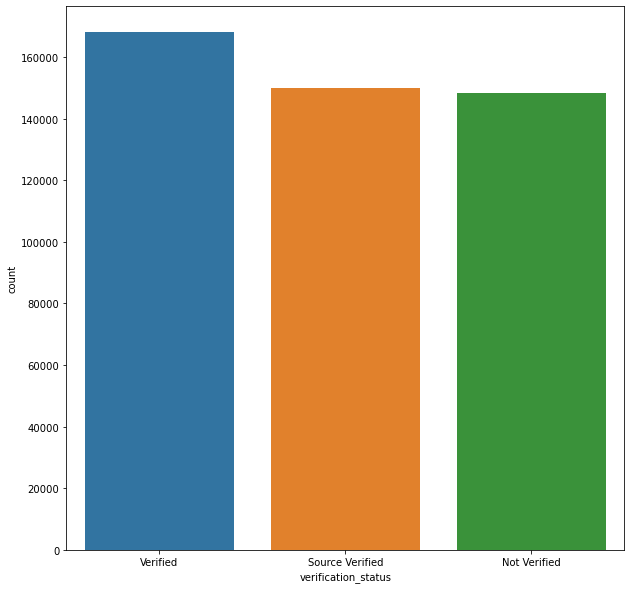

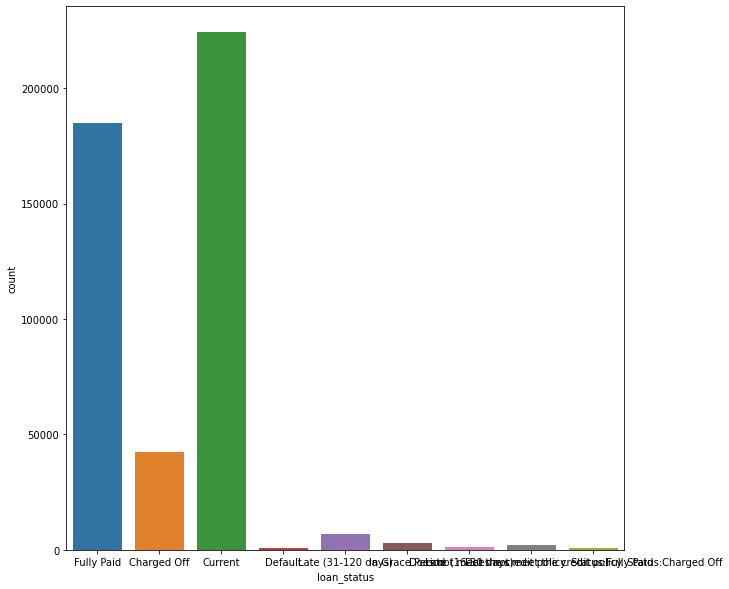

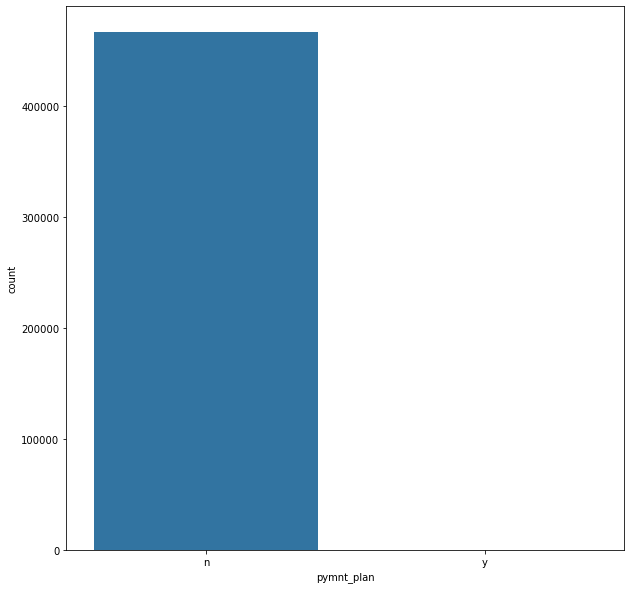

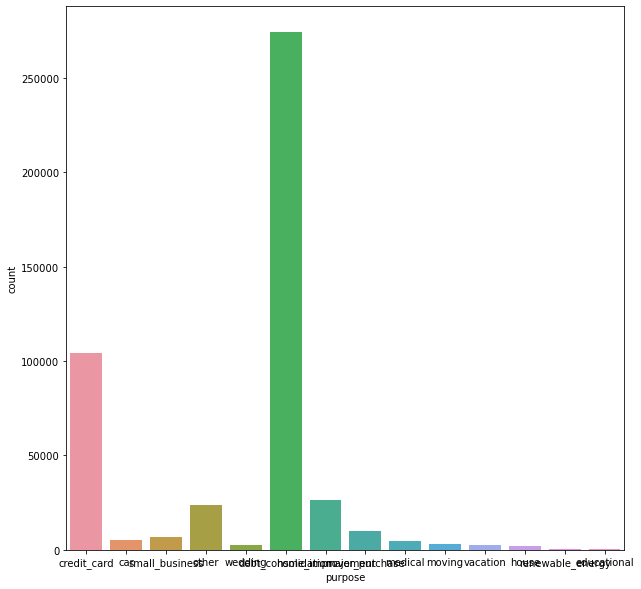

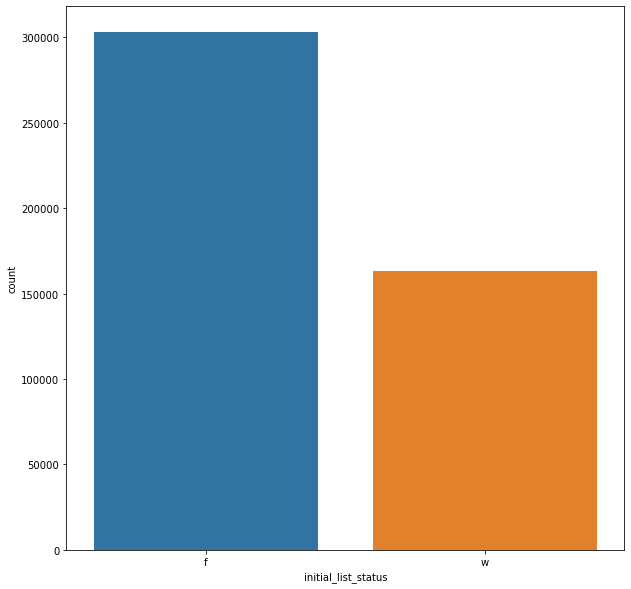

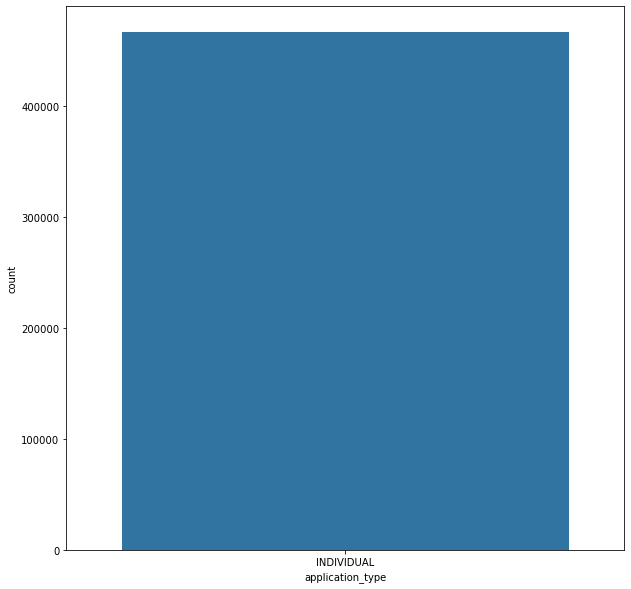

In [19]:
for i in colDatType:
    if df[i].nunique() < 15:
        plt.figure(figsize = (10,10))
        sns.countplot(data = df, x = i)     
        plt.show()